<a href="https://colab.research.google.com/github/prosperjohn9/pca/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. Dimensions are nothing but features that represent the data. One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

Principal components are the key to PCA; they represent what's underneath the hood of your data, they have have both direction and magnitude.

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60000 images each of 32x32x3 color images having ten classes, with 6000 images per category.

The dataset consists of 50000 training images and 10000 test images.

The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

Breast Cancer Data Exploration

In [39]:
# Import the necessary libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
%matplotlib inline

breast = load_breast_cancer()
breast_data = breast.data

# Show the shape of the breast cancer dataset
breast_data.shape

(569, 30)

In [40]:
# Load and show the shape of the labels
breast_labels = breast.target
breast_labels.shape

(569,)

In [41]:
# Reshape the breast_labels to concatenate it with the breast_data to create a DataFrame which will have both the data and labels.
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
'''
This code uses the NumPy library to concatenate two arrays, breast_data and labels, along the second axis (axis=1).
The resulting array, final_breast_data, will have the same number of rows as breast_data and an additional column for the labels data.
breast_data has shape (569, 30) and labels has shape (569, 1), then final_breast_data will have shape (569, 31).
'''

# Show the shape of final_breast_data
final_breast_data.shape

(569, 31)

In [42]:
# Create a dataframe
breast_dataset = pd.DataFrame(final_breast_data)

# Print the features of the breast cancer dataset
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
# Add label to features
features_labels = np.append(features,'label')

# Embed column names to breast dataset
breast_dataset.columns = features_labels

# Print first few rows
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [44]:
# Change labels to Benign and Malignant
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

# Print last few rows
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


Visualizing the breast cancer data

In [45]:
# Standardize the data
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

x.shape

(569, 30)

In [46]:
# Check if normalized data has a mean of zero and a standard deviation of one.
np.mean(x),np.std(x)

(-6.118909323768877e-16, 1.0)

In [47]:
# Convert the normalized features into a tabular format with the help of DataFrame.
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [48]:
# Two-dimensional principal components
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

# Create a DataFrame that will have the principal component values for all 569 samples.
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [49]:
# Find the explained_variance_ratio
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_)) #36.8% information was lost

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

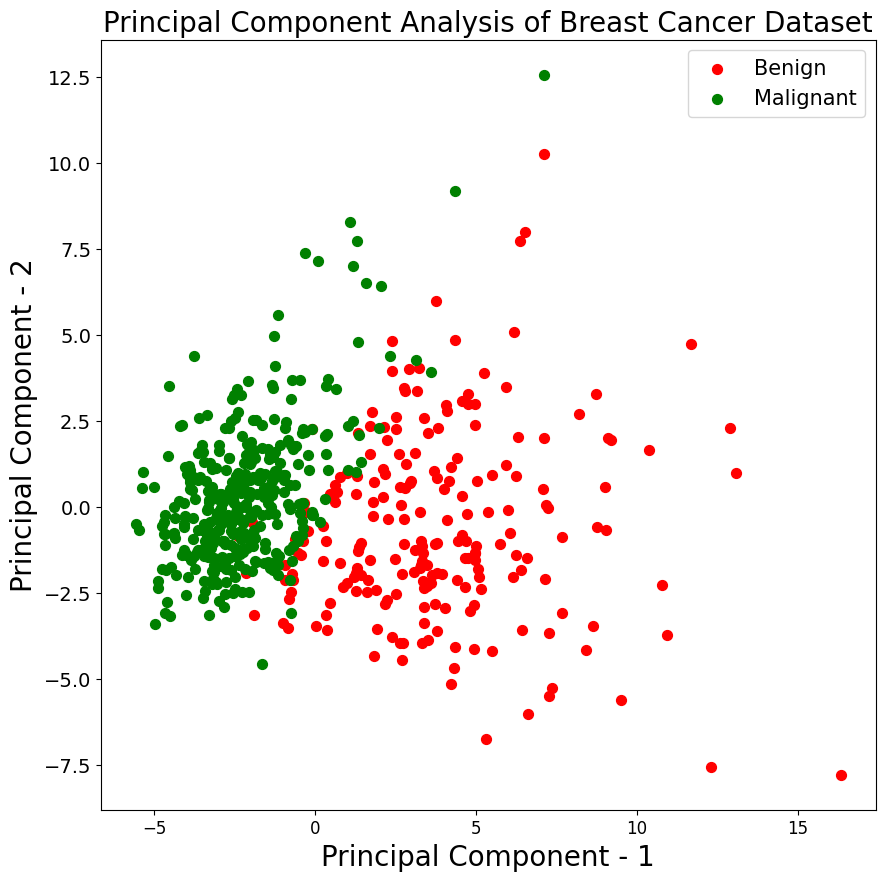

In [50]:
# Plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

CIFAR - 10 Data Exploration

In [51]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print the shape of testing and training image
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [52]:
# Print shape of label
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [53]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


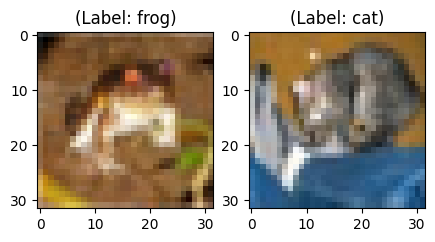

In [54]:
# Dictionary with class names and labels
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


Visualizing the CIFAR - 10 data

In [55]:
# Check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive
np.min(x_train),np.max(x_train)

x_train = x_train/255.0
np.min(x_train),np.max(x_train)

x_train.shape

(50000, 32, 32, 3)

In [56]:
# Reshape the image dimensions from three to one (flatten the images)
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

# Create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [57]:
# Print first few rows
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [58]:
# Create the PCA method and pass the number of components as two and apply fit_transform on the training data
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

# Convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

# Print first few rows
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [59]:
# Find out the amount of information or variance the principal components hold
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

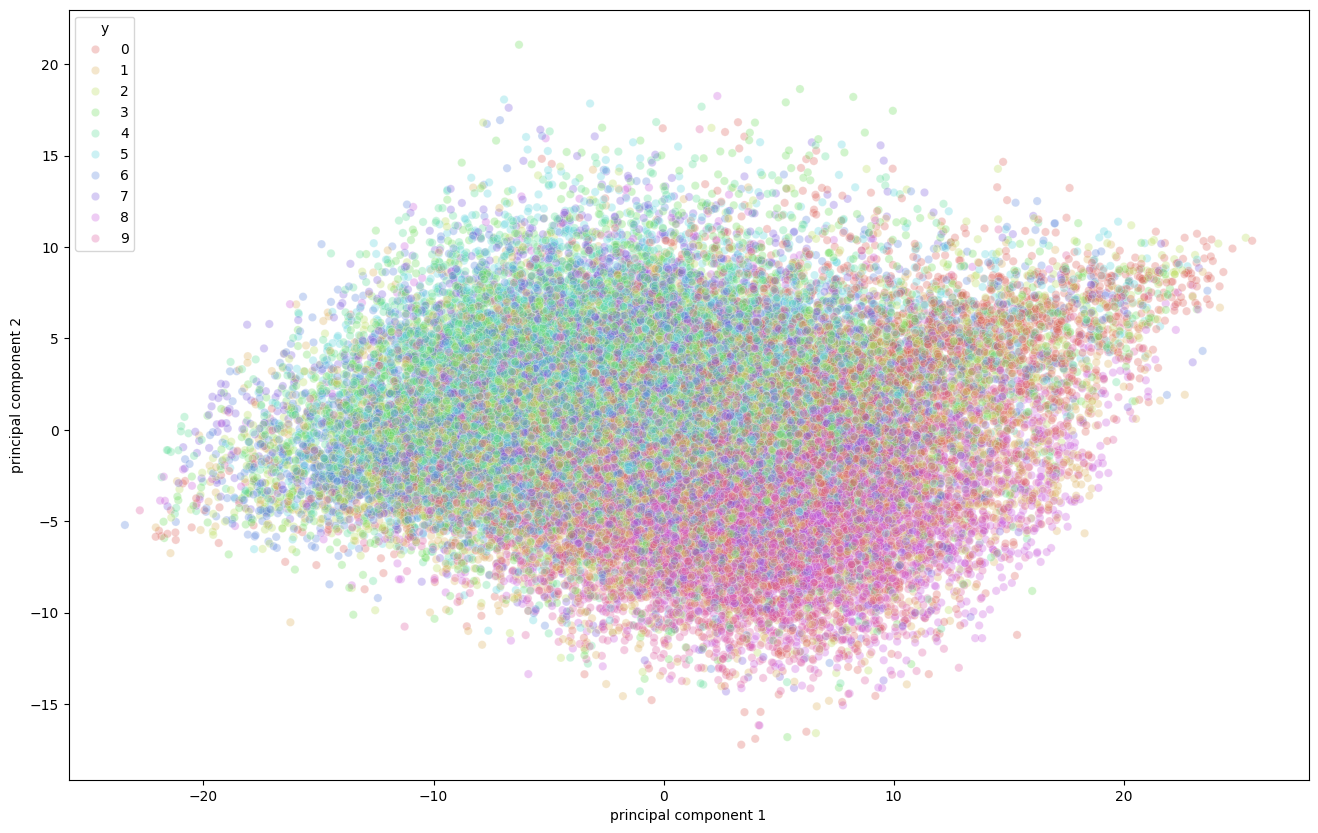

In [60]:
# Plot the visualization
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [61]:
# Normalize testing image
x_test = x_test/255.0

x_test = x_test.reshape(-1,32,32,3)

# Reshape test data
x_test_flat = x_test.reshape(-1,3072)

# PCA of 90%
pca = PCA(0.9)

# Fit PCA on training images
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Find out how many components PCA used for 90% variance
pca.n_components_

99

In [62]:
# Apply transform on both the training and test set to generate a transformed dataset from the parameters generated from the fit method
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

# Convert training and testing labels to one-hot encoding vector
y_train = to_categorical(y_train, 10) # 10 is the number of classes
y_test = to_categorical(y_test, 10)

# Define the number of epochs, number of classes, and the batch size
batch_size = 128
num_classes = 10
epochs = 20

# Define Sequential model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,))) # Ensure the input shape matches PCA components
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Print model summary to check architecture and parameters
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              102400    
                                                                 
 dense_16 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1810698 (6.91 MB)
Trainable params: 1810698 (6.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_img_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 25s 55ms/step - loss: 1.6323 - accuracy: 0.4203 - val_loss: 1.4956 - val_accuracy: 0.4722
Epoch 2/20
391/391 [==============================] - 23s 58ms/step - loss: 1.3210 - accuracy: 0.5328 - val_loss: 1.3351 - val_accuracy: 0.5274
Epoch 3/20
391/391 [==============================] - 22s 56ms/step - loss: 1.1470 - accuracy: 0.5926 - val_loss: 1.2884 - val_accuracy: 0.5411
Epoch 4/20
391/391 [==============================] - 21s 53ms/step - loss: 0.9894 - accuracy: 0.6447 - val_loss: 1.3472 - val_accuracy: 0.5481
Epoch 5/20
391/391 [==============================] - 22s 56ms/step - loss: 0.8318 - accuracy: 0.7022 - val_loss: 1.3532 - val_accuracy: 0.5659
Epoch 6/20
391/391 [==============================] - 22s 56ms/step - loss: 0.6744 - accuracy: 0.7585 - val_loss: 1.5759 - val_accuracy: 0.5472
Epoch 7/20
391/391 [==============================] - 21s 53ms/step - loss: 0.5316 - accuracy: 0.8094 - val_loss: 1.5280 - val_accuracy:

In [64]:
# Time the model takes to train on the original dataset
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 45s 114ms/step - loss: 2.1148 - accuracy: 0.2438 - val_loss: 1.9150 - val_accuracy: 0.3148
Epoch 2/20
391/391 [==============================] - 43s 111ms/step - loss: 1.8310 - accuracy: 0.3392 - val_loss: 1.8057 - val_accuracy: 0.3471
Epoch 3/20
391/391 [==============================] - 45s 115ms/step - loss: 1.7336 - accuracy: 0.3747 - val_loss: 1.6628 - val_accuracy: 0.4017
Epoch 4/20
391/391 [==============================] - 45s 114ms/step - loss: 1.6557 - accuracy: 0.4053 - val_loss: 1.6163 - val_accuracy: 0.4207
Epoch 5/20
391/391 [==============================] - 46s 118ms/step - loss: 1.6025 - accuracy: 0.4268 - val_loss: 1.6196 - val_accuracy: 0.4241
Epoch 6/20
391/391 [==============================] - 43s 110ms/step - loss: 1.5541 - accuracy: 0.4443 - val_loss: 1.6050 - val_accuracy: 0.4388
Epoch 7/20
391/391 [==============================] - 45s 114ms/step - loss: 1.5110 - accuracy: 0.4586 - val_loss: 1.5126 - val_ac

By applying PCA on the training data you were able to train your deep learning algorithm not only fast, but it also achieved better accuracy on the testing data when compared with the deep learning algorithm trained with original training data.